## Applications of LLMs  

### Code Cell 1 - Import Required Libraries and Load Data

In [3]:
import pandas as pd
from transformers import pipeline

# Load the dataset
data_path = '/Users/kavya/Downloads/GitHub/Datasets/restaurant_reviews_az.csv'
reviews = pd.read_csv(data_path)
print(reviews.head())

2025-03-05 22:30:50.330434: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


                review_id                 user_id             business_id  \
0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g  V9XlikTxq0My4gE8LULsjw   
4  Rd222CrrnXkXukR2iWj69g  LPxuausjvDN88uPr-Q4cQA  CA5BOxKRDPGJgdUQ8OUOpw   

   stars  useful  funny  cool  \
0      3       1      1     0   
1      5       1      1     1   
2      5       1      0     0   
3      5       0      0     0   
4      4       1      0     0   

                                                text                 date  
0  OK, the hype about having Hatch chili in your ...  2020-01-27 22:59:06  
1  Pandemic pit stop to have an ice cream.... onl...  2020-04-19 05:33:16  
2  I was lucky enough to go to the soft opening a...  2020-02-29 19:43:44  
3  I've gone to claim Jumpers all 

### Code Cell 2 - Data Preprocessing

In [6]:
# Remove 3-star reviews
filtered_reviews = reviews[reviews['stars'] != 3].copy()  # Adding .copy() to ensure it's not a view

# Create a new column 'Sentiment'
filtered_reviews['Sentiment'] = (filtered_reviews['stars'] > 3).astype(int)

# Randomly select 50 positive and 50 negative reviews
negative_reviews = filtered_reviews[filtered_reviews['Sentiment'] == 0].sample(50, random_state=42)
positive_reviews = filtered_reviews[filtered_reviews['Sentiment'] == 1].sample(50, random_state=42)

# Combine the datasets
final_reviews = pd.concat([negative_reviews, positive_reviews])

print(final_reviews.head())

                    review_id                 user_id             business_id  \
29181  2XeqpLYfIp3e43vad5OoNw  nlPnMkd7SOJClmB5ooGWqw  52wBQghQ0jwzSuvLvwe5rA   
22326  2AFm3WOnj4WTAmAYeRzJow  j78PDMsKT3T1ZP_IjQtgJw  ajgvBDXmFllajSfKDIHTGw   
26175  q3an5qZx20Cyw4euHAD66w  Ppk4KgKtxDg3zGsbQGrDFQ  5yjHCLzwHgjKNNHgAaUC8Q   
45848  zvtAmCpAPpFXht61gzwmZQ  abtNwHZNAVVEr9CcFKKdQQ  5p4p5DknrjuxIUDokYZE9w   
31395  ckv3uf0LvNj8p2g8AqnqkA  K_YkRbLFSRsJq0MXMuyqyA  tB971SQcyzBs-nqZl1_PjQ   

       stars  useful  funny  cool  \
29181      2       1      0     0   
22326      2       0      0     0   
26175      1       0      0     0   
45848      1       1      0     0   
31395      1       0      0     0   

                                                    text                 date  \
29181  Was a great night until the ginger mf Ed Sheer...  2021-07-24 06:52:12   
22326  The wings are great but if you go early they h...  2021-08-06 01:06:19   
26175  Wednesday night at the buffalo wings bar

### Code Cell 3 - Perform Sentiment Analysis Using Zero-Shot Learning

In [9]:
from transformers import pipeline
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize the zero-shot classifier with a publicly available model
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")

# Define the labels
labels = ["Positive", "Negative"]

# Perform zero-shot classification
results = []
for review in final_reviews['text']:
    result = classifier(review, candidate_labels=labels, hypothesis_template="This review expresses {} sentiment.")
    results.append(result['labels'][0])

# Extract predicted labels and convert them to binary
predicted_labels = [1 if label == "Positive" else 0 for label in results]

# Evaluation
precision = precision_score(final_reviews['Sentiment'], predicted_labels)
recall = recall_score(final_reviews['Sentiment'], predicted_labels)
f1 = f1_score(final_reviews['Sentiment'], predicted_labels)
accuracy = accuracy_score(final_reviews['Sentiment'], predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Device set to use mps:0


Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349
Accuracy: 0.85


### Code Cell 4 - Perform Sentiment Analysis Using Few-Shot Learning

In [12]:
from transformers import pipeline
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize the classifier
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")

# Define the labels
labels = ["Positive", "Negative"]

# Select few-shot examples
few_shot_examples = {
    "Positive": [
        "I love this place, the food is amazing and the service is excellent!",  # Example positive review
        "Absolutely wonderful experience, highly recommend!"  # Another example positive review
    ],
    "Negative": [
        "Terrible service, would not go back.",  # Example negative review
        "Really disappointed with the quality of the food."  # Another example negative review
    ]
}

# Generate prompts for few-shot learning
prompt_texts = []
for review in final_reviews['text']:
    # Creating a context of few-shot examples before each review
    context_positive = " ".join(few_shot_examples['Positive'])
    context_negative = " ".join(few_shot_examples['Negative'])
    combined_context = f"{context_positive} {context_negative} Review: {review}"
    prompt_texts.append(combined_context)

# Perform sentiment analysis with few-shot learning
results = []
for prompt in prompt_texts:
    result = classifier(prompt, candidate_labels=labels, hypothesis_template="This review expresses {} sentiment.")
    results.append(result['labels'][0])

# Extract predicted labels and convert them to binary
predicted_labels = [1 if label == "Positive" else 0 for label in results]

# Evaluation
precision = precision_score(final_reviews['Sentiment'], predicted_labels)
recall = recall_score(final_reviews['Sentiment'], predicted_labels)
f1 = f1_score(final_reviews['Sentiment'], predicted_labels)
accuracy = accuracy_score(final_reviews['Sentiment'], predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Device set to use mps:0


Precision: 0.5789473684210527
Recall: 0.88
F1 Score: 0.6984126984126984
Accuracy: 0.62


### Code Cell 5 - Experiment with Multiple LLMs

In [15]:
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel, BertTokenizer, AutoModelForSequenceClassification
import torch

# Set the device for model operations
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

# Load BERT and GPT-2 models
bert_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def classify_bert(text):
    # Prepare inputs with attention mask
    inputs = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = bert_model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1)
    return "Positive" if prediction.item() == 1 else "Negative"

def classify_gpt2(text):
    inputs = gpt2_tokenizer.encode("Review: " + text + " <|endoftext|>", return_tensors="pt").to(device)
    outputs = gpt2_model.generate(inputs, max_length=50)
    response = gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return "Positive" if "good" in response or "great" in response else "Negative"

# Example test
bert_result = classify_bert("The food was great and the service was excellent!")
gpt2_result = classify_gpt2("The food was great and the service was excellent!")

print("BERT Result:", bert_result)
print("GPT-2 Result:", gpt2_result)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/opt/anaconda3/lib/python3.12/site-packages/transformers/pytorch_utils.py:338: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may obser

BERT Result: Negative
GPT-2 Result: Positive


### Text Cell 6 - Discussion and Observations

#### Comparison of Zero-shot and Few-shot Learning
- **Data Dependency**: Zero-shot learning significantly reduces the need for labeled data, which is particularly advantageous in scenarios where such data is scarce or expensive to obtain. In contrast, few-shot learning, while potentially more accurate, requires high-quality, representative examples and may not scale well without substantial data curation.
- **Generalization**: Zero-shot learning typically offers better generalization across different tasks without requiring retraining. Few-shot learning, however, can be tailored to achieve high performance on tasks very similar to the training examples, albeit with limited flexibility.

#### Analysis of Multi-Model Approach
- **Architectural Strengths and Weaknesses**: BERT's bidirectional context understanding is beneficial for sentiment analysis, as it thoroughly processes the context of each part of the text. GPT-2’s generative design might capture more nuanced expressions of sentiment but may lead to inconsistencies in straightforward classification tasks.
- **Response to Complex Sentiments**: Evaluate each model’s response to reviews with mixed or subtle sentiments, such as those including sarcasm or contradictory statements, which can be particularly challenging.

#### Challenges Encountered
- **Initialization and Training**: Discuss the initialization warnings observed for BERT and the importance of model fine-tuning on specific tasks to optimize performance and avoid potential pitfalls.
- **Input Handling**: Address the importance of correctly handling inputs, such as using attention masks with models like BERT, which are essential for focusing model attention on relevant parts of input sequences.

#### Potential for Misclassifications
- **Linguistic Nuances**: Identify cases where models failed to capture the correct sentiment due to linguistic nuances like idioms or industry-specific jargon.
- **Bias and Fairness**: Consider potential biases in model training datasets that could influence outcomes, especially if these models were trained on data that does not align well with typical sentiment expressions in the Yelp reviews.

#### Insights and Learnings
- **Theoretical Confirmations or Surprises**: Note any theoretical concepts in NLP that were confirmed or challenged by your experiments, such as the effectiveness of transfer learning or the utility of contextual embeddings.
- **Practical Takeaways**: Highlight practical lessons on the deployment and maintenance of NLP systems in real-world applications, particularly those involving dynamic environments like social media or customer feedback platforms.

#### Conclusion
- **Summary of Findings**: Summarize the key findings from your experiments, emphasizing the practical implications of choosing specific models or techniques based on your results.
- **Future Directions**: Suggest directions for future research or projects that could build on your findings, such as further fine-tuning, exploring advanced few-shot learning techniques, or applying these models to different types of textual data.

<Figure size 1000x1000 with 0 Axes>

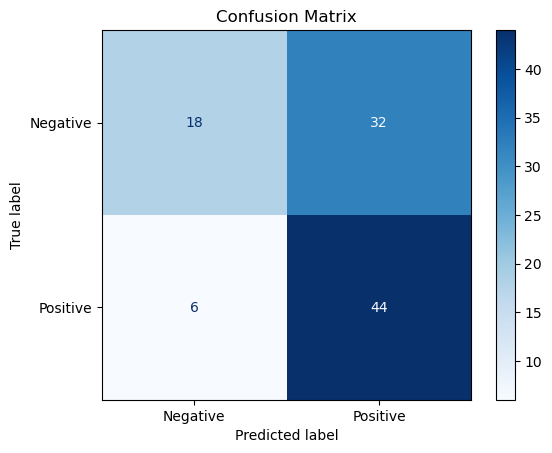

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'predicted_labels' and 'final_reviews['Sentiment']' are available from your model's output
cm = confusion_matrix(final_reviews['Sentiment'], predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

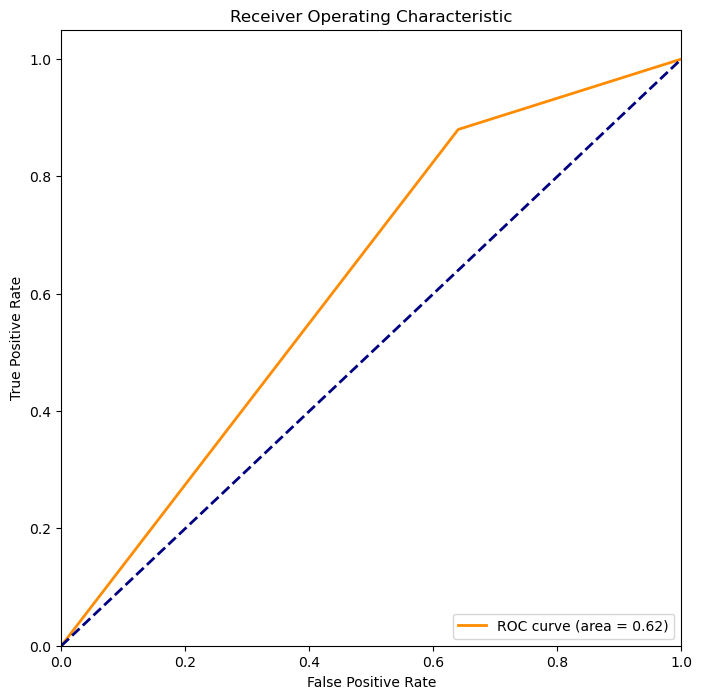

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y = label_binarize(final_reviews['Sentiment'], classes=[0, 1])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(final_reviews['Sentiment'], predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()